# Arses Prasai  F007JFG

# Part 1: Linear Regression on Homicide Rate in Detroit

##### Insert a description of the method you use for your model here. Some example methods are described in Chapter 3 of the textbook. Implement your formulation and then conduct experiments to determine the third variable. In your report, be sure to provide the step-by-step mathematical formulation (citing Chapter 3 as needed) that corresponds to the implementation you turn in. Also give plots and a rigorous argument to justify the scheme you use and your conclusions.

You are allowed to use sklearn for this HW.

<font size = 6> Report

<font size = 4>

For solving this regression problem, I employed a few of the strategies mentioned in Chapter 3 of the MML book and concepts from class. Specifically, I use projection onto lower dimensional space to examine the third feature vector. As mentioned in the text, there are three main variables that affect the homicide rate. So, compressing the data onto the three dimensions spanned by these three feature vectors should give us the most of the information about the results. However, when we compress or visualize high-dimensional data, we will lose information. So intuitively, the third vector would be the vector that, in combination with FTP, WE, would result in the lowest loss upon compression/projection. 

The goal is to find the optimal parameter vector x ∈ Rn (i.e., the weights x = [w1, w2, . . . , wn]⊤) such that the predicted values Ax are as close as possible to the actual targets b in the least-squares sense. Here, A is the matrix with the three target vectors as its columns. These optimal parameters are given by x⋆ = (A⊤A)−1A⊤b where (A⊤A)−1A⊤ is the pseudo-inverse of A. Once these optimal parameters are determined, we then find the closest point b* in Col(A) to b—that is, the orthogonal projection b* o/f b onto Col(A).

Knowing this, the third vector would be the vector that would give a projection closest to the actual vector. 
So, I conduct my experimentation as follows: 

1. Find the Pseudo-Inverse
2. Find the optimal Pararmetrs x*
3. Find the projection of HOM onto the column space of fetaure-space
4. Do this iteratively for all the features 
5. Evaluate which vector, in addition to FTE and WE, gives a projection with least difference (using MSE)

The MSE for UEMP : 15.821919642835212
The MSE for MAN : 10.500526110448517
The MSE for LIC : 3.517894843663972
The MSE for GR : 6.921036971806307
The MSE for NMAN : 4.238659866661527
The MSE for GOV : 4.068484663061017
The MSE for HE : 16.361881904016656


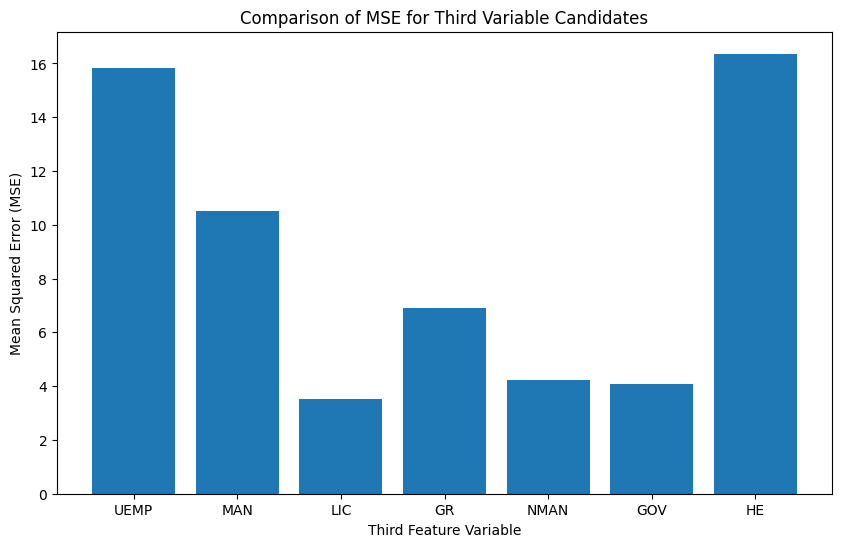


Generating plots for the best model: LIC


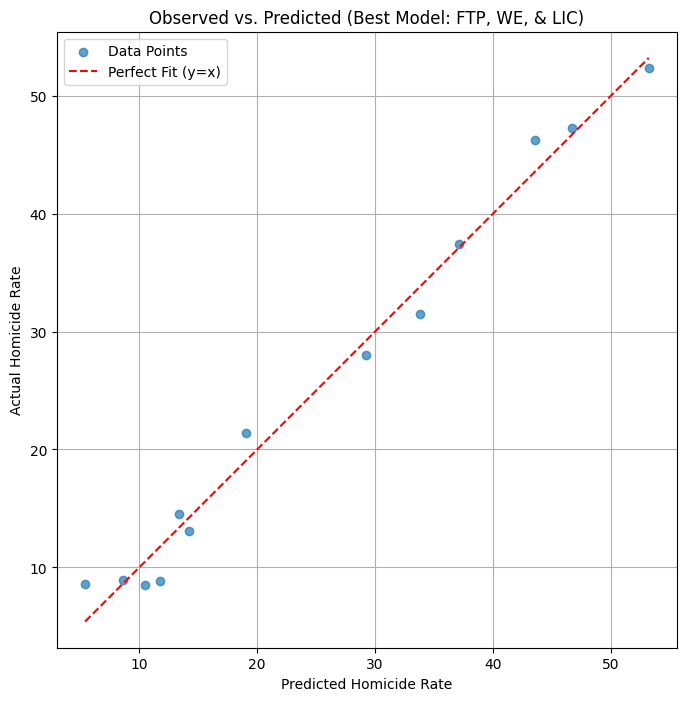

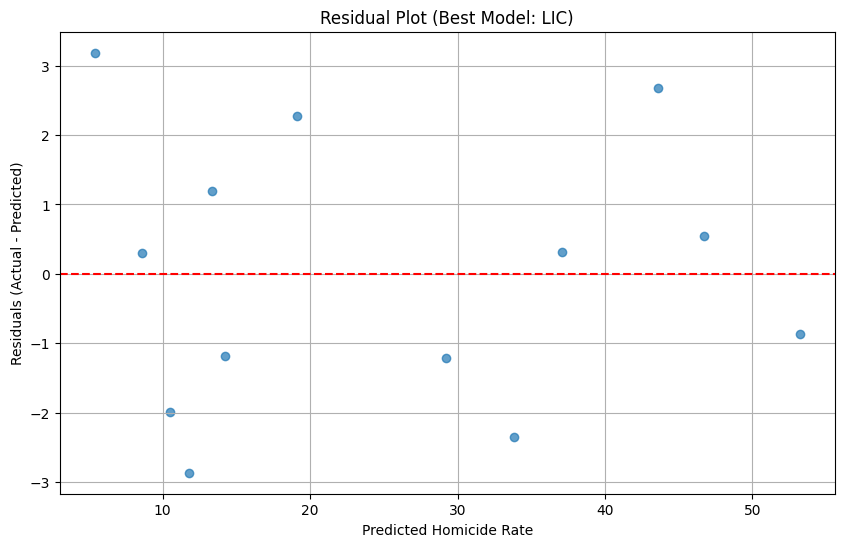

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed
seed = 54
np.random.seed(seed)

def main():
    data = np.load('detroit.npy')
    data = data.T
    FTP, UEMP, MAN, LIC, GR, NMAN, GOV, HE, WE, HOM = data    
    investigate ={"UEMP":UEMP, "MAN":MAN, "LIC": LIC, "GR":GR, "NMAN": NMAN,"GOV" :GOV, "HE":HE}
    bias = [1] * len(FTP)
    errors = {}
    projections = {}

    for name, feature in investigate.items(): 
        matrix = [np.array(bias), np.array(FTP), np.array(WE), np.array(feature)]
        transpose = np.array(matrix)   
        matrix = transpose.T

        psuedo = np.matmul( np.linalg.inv(np.matmul(transpose, matrix)), transpose)
        parameters= np.matmul(psuedo, HOM)
        projection = np.matmul(matrix, parameters)
        error = 0 
        error = np.square(projection - HOM)
        mse= np.mean(error)
        errors[name]= mse
        projections[name] = projection 
        print("The MSE for", name, ":", mse)


    x = list(errors.keys())
    y = list(errors.values())

    plt.figure(figsize=(10, 6)) # Make a new figure window
    plt.bar(x, y)
    plt.xlabel("Third Feature Variable")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("Comparison of MSE for Third Variable Candidates")
    plt.show()

    
    # Find the best model to make the next plots
    best_variable_name = min(errors, key=errors.get)
    best_projection = projections[best_variable_name]
    print(f"\nGenerating plots for the best model: {best_variable_name}")

    
    # Observed vs. Predicted (for Best Model)
    plt.figure(figsize=(8, 8))
    plt.scatter(best_projection, HOM, alpha=0.7, label="Data Points")
    
    #  y=x line for reference
    min_val = min(np.min(best_projection), np.min(HOM))
    max_val = max(np.max(best_projection), np.max(HOM))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Fit (y=x)") 
    
    plt.xlabel("Predicted Homicide Rate")
    plt.ylabel("Actual Homicide Rate")
    plt.title(f"Observed vs. Predicted (Best Model: FTP, WE, & {best_variable_name})")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    
    #  Residual Plot (for Best Model)
    residuals = HOM - best_projection

    plt.figure(figsize=(10, 6))
    plt.scatter(best_projection, residuals, alpha=0.7)
    
    #  y=0 line for reference
    plt.axhline(y=0, color='r', linestyle='--') 
    
    plt.xlabel("Predicted Homicide Rate")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f"Residual Plot (Best Model: {best_variable_name})")
    plt.grid(True)
    plt.show()


main()

<font size= 4> My analysis is based on three plots:

1. MSE Comparison: A bar chart comparing the Mean Squared Error (MSE) for all 7 candidate variables. This plot proves that LIC is the optimal choice, as it resulted in the lowest MSE (best model fit)

2. Observed vs. Predicted: A scatter plot showing our best model's predictions against the actual homicide rates. The points form a tight cluster around the $y=x$ line, confirming the model is highly accurate.

3. Residual Plot: A plot of the model's errors (residuals). This shows a random scatter of points around zero with no pattern, which validates our use of a linear model and confirms its assumptions are met.In short, the plots show we picked the right variable, the resulting model is accurate, and the linear method was a valid choice.

# Part 2: Gradient Descent

According to Wikipedia, "In mathematics, gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function". It is a machine learning algorithm that operates iteratively to find the optimal values for its parameters which are then fed to the machine learning model to build a model which predicts a value with minimal error. 


The gradient descent algorithm is given below -


1.   Choose a starting point or the initialization of values
2.   Calculate the gradient at this point
3.   Make a scaled step in the opposite direction to the gradient in order to minimize it
4.   Repeat step 2 and step 3 until local minima is reached



The mathematical formula for this algorithm is given by-

\begin{align}
    f_n(x) = f_{n-1}(x) - alpha * g'(f_{n-1}(x))
  \end{align}

where $f_n(x)$ represents the parameter's value at iteration n, alpha is the learning rate and the function g represents the cost function that needs to be minimized. 

We will build this algorithm step by step. First, we will learn to calculate the gradient of a function. One of the ways is to calculate the gradient manually and plug in the values. We can also directly calculate the gradient using PyTorch's autograd. It returns a function which is a differentiation of the given function. You can read the documentation [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#:~:text=autograd%20is%20PyTorch's%20automatic%20differentiation,helps%20a%20neural%20network%20train.).

**Question 1:** Calculate the gradient of the function - 

\begin{align}
    g(x)= 2*x^3 + x*sin(x) + 5 
  \end{align}

You have to implement this funciton g(x) and let autograd do its work. Calculate the value of the gradient at x = 30.

In [40]:
from autograd import grad
import autograd.numpy as np

def implement_g(x):

    return (2*(x**3)) + (x*np.sin(x)) + (5)

def try_autograd(x):
    # We pass the function g(x) as an input to this grad function from autograd
    gradient = grad(implement_g)
    ans = gradient(x)
    return ans

print(try_autograd(30.0))

5403.639511872535


Now that we know how to calculate the gradient, we will implement the gradient descent algorithm for a given set of values.

**Question 2:** Let the learning rate or alpha be 0.5 and the number of iterations be 100. Calculate the parameter value at every step of the iteration and store them in an array and return the array. Use autograd function as before to calculate the gradient of the given function. 

\begin{align}
    g(x) = |x|
  \end{align}

Let the initial value of f(x) be $f_0(x)$ = 1.75.

In [41]:
def implement_new_g(x):
    return abs(x)    

def gradient_descent(g, w0, alpha, n):

    parameter_history = []
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    w = w0
    cost_history = []

    #loop to carry out gradient descent
    for __ in range(n):
        cost = g(w)
        cost_history.append(cost)
        parameter_history.append(w)
        w -= alpha*gradient(w)

        #setting a border condition for the value of gradient 
        # if abs(gradient(w)) < 0.01:
        #     break   

    return parameter_history

first = gradient_descent(implement_new_g, 1.75, 0.5, 100)
print(first) 

[1.75, np.float64(1.25), np.float64(0.75), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.25), np.float64(0.25), np.float64(-0.

**Quesrion 3:** Plot the graph of the parameter history.

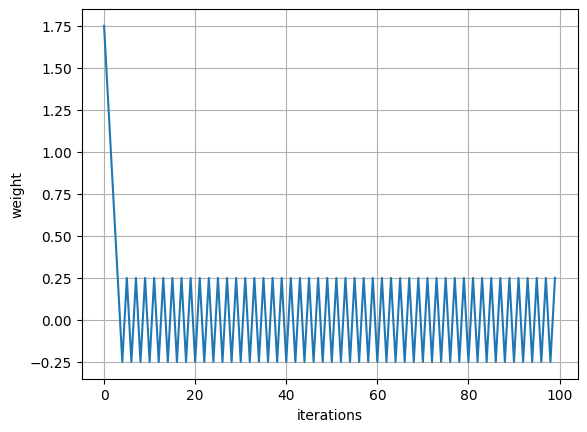

In [42]:
import matplotlib.pyplot as plt
plt.plot( first)
plt.xlabel('iterations')
plt.ylabel('weight')
plt.grid()
plt.show()

**Question 4:** Run the gradient descent algorithm with the follwing set of values in two runs and plot the parameter histories on the same graph using red color for first run and blue color for the second run.

*Run 1*: \\
g = square root of (x* x* x)

w = 1.0

max_its=100

alpha=0.1

*Run 2*: \\
g = square root of (x*x)

w = 1.5

max_its=100

alpha=0.01

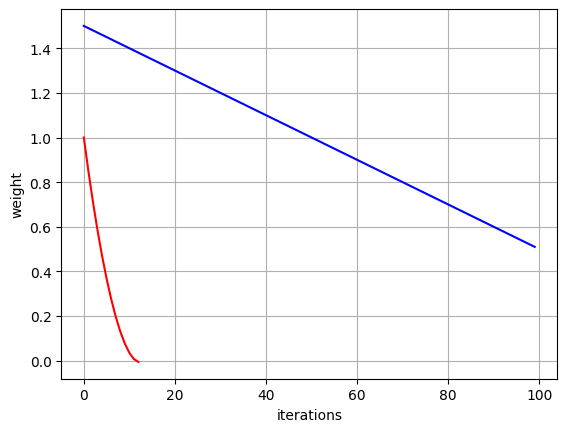

In [43]:
def implement_g1(x):
    return np.sqrt(x**3)

def implement_g2(x):
    return np.sqrt(x**2)

second = gradient_descent(implement_g1, 1.0, 0.1, 100)
third = gradient_descent(implement_g2, 1.5, 0.01, 100)
plt.plot(second, color='red', label='Run 1: g=x^(3/2), a=0.1') 
plt.plot(third, color='blue', label='Run 2: g=|x|, a=0.01')
plt.xlabel('iterations')
plt.ylabel('weight')
plt.grid()
plt.show()

**Happy Learning**